Software projects vs Number of Stars

Popularity of software projects is one of the important measures of trust whereb, for example, the number of github stars indicate number of developers who "watch" them.

To model this quantity to understand what causes some projects to have more stars we collect data from WoC on 
- project ID
- the project duration,
- from date,
- number of authors, 
- number of commits,
- number of Core Developers,
- number of commits by Top Developers
- number of stars.

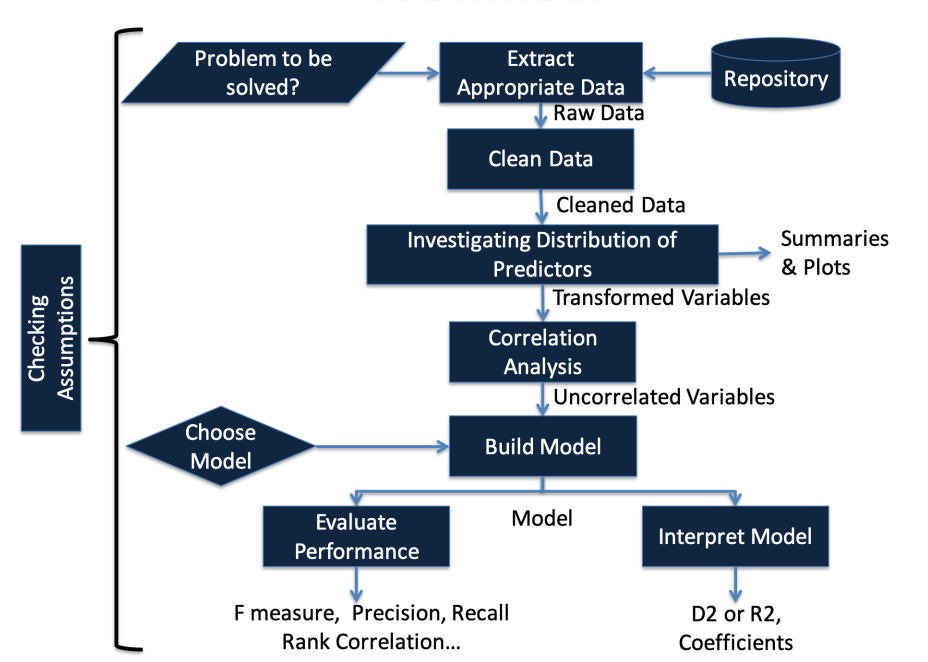


## There are two types of analysis performe
* the first one is about filtering by the outcomes. So, filtering  by star rating. This approach allows to measure if the outcome can change the overall dependency of the varialbe. 
* The second  is where we will use random varaibles that are outside of the predictor equation. in the predictor, we have used log of dur, nc, na, nCore. thus the outside variables are p (project id), fr (from date), nc1 (NumCommitsByTopDev). 
* We plan to filter the data based on nc1 (NumCommitsByTopDev) to understand how outside variables can change the values. 

In [38]:
#------------------------------DATA EXTRACTION------------------------------
library(dplyr)
#Read data from the file and add the name for each of the columns
library(data.table) #quick reading
x=read.table("prjSU0",sep=";",quote="",comment.char="",nrows=100000) # 100K in scope
names(x) = c("p","dur","fr","na","nc","nCore","nc1","ns")

# filter by nc1 or ns
data_frame_mod<-filter(x, ns>5) # what happens? 

x <- data_frame_mod

head(x) # Health check

#ProjID, ProjDuration(sec), FromDate(sec,1970), NumAuthors, 
#NumCommits", NumCoreDevelopers", NumCommitsByTopDev, NumStar)


,p,dur,fr,na,nc,nCore,nc1,ns
,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
1,0_Eos,185669433,1251425611,5,55,1,45,17
2,0-0-0-_StellarKit,42942881,1515043676,6,399,2,292,17
3,0-1-0_Python-packet-sniffer,317801568,1238859570,5,118,1,105,90
4,0-14N_NDroid,145317503,1397548143,3,134,1,109,57
5,0-6-1-7_rosreestr,25578719,1581618959,1,108,1,108,16
6,0-8-15_chicken-yaml,243288391,1366076663,4,131,1,118,14


Health check for imported data
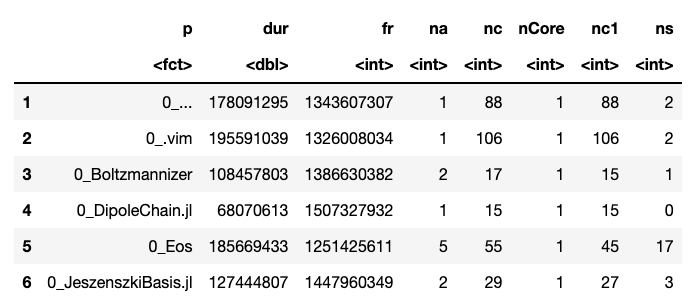

In [28]:
#------------------------------CLEAN DATA------------------------------

# Completeness of data
colSums(is.na(x)) # check for empty fields


p   dur    fr    na    nc nCore   nc1    ns 
    0     0     0     0     0     0     0     0

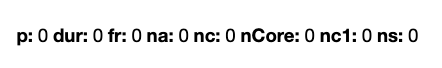

In [29]:
#------------------------------DATA ANALYSIS------------------------------

#Initial data validation
str(x) # Variables, Types, Factor, Quantities
summary(x) # Distribution, min, max, mead vs median, Q3 vs mean


'data.frame':	20550 obs. of  8 variables:
 $ p    : Factor w/ 100000 levels "0_...","0_.vim",..: 1 2 24 8 22 25 29 30 31 32 ...
 $ dur  : num  1.78e+08 1.96e+08 6.41e+07 1.47e+07 1.53e+07 ...
 $ fr   : int  1343607307 1326008034 1478827025 1353183063 1368432000 1445975559 1458292674 1423212676 1409993201 1451911714 ...
 $ na   : int  1 1 2 1 1 1 1 2 3 1 ...
 $ nc   : int  88 106 72 88 601 54 345 68 1579 816 ...
 $ nCore: int  1 1 1 1 1 1 1 1 1 1 ...
 $ nc1  : int  88 106 70 88 601 54 345 66 1577 816 ...
 $ ns   : int  2 2 3 1 0 0 0 0 0 0 ...


                    p              dur                  fr           
 0_...               :    1   Min.   :8.641e+05   Min.   :4.973e+08  
 0_.vim              :    1   1st Qu.:6.942e+06   1st Qu.:1.471e+09  
 0_graph-sandbox     :    1   Median :1.996e+07   Median :1.525e+09  
 0_streaking-joel    :    1   Mean   :4.051e+07   Mean   :1.509e+09  
 0_VibronicToolkit.jl:    1   3rd Qu.:5.201e+07   3rd Qu.:1.567e+09  
 0--_0--.github.io   :    1   Max.   :1.128e+09   Max.   :1.612e+09  
 (Other)             :20544                                          
       na                 nc                nCore              nc1           
 Min.   :   1.000   Min.   :     51.0   Min.   :  1.000   Min.   :     51.0  
 1st Qu.:   1.000   1st Qu.:     74.0   1st Qu.:  1.000   1st Qu.:     64.0  
 Median :   2.000   Median :    109.0   Median :  1.000   Median :     87.0  
 Mean   :   3.475   Mean   :    331.3   Mean   :  1.604   Mean   :    263.7  
 3rd Qu.:   3.000   3rd Qu.:    187.0   3rd Qu.:  

Data is not properly distributed
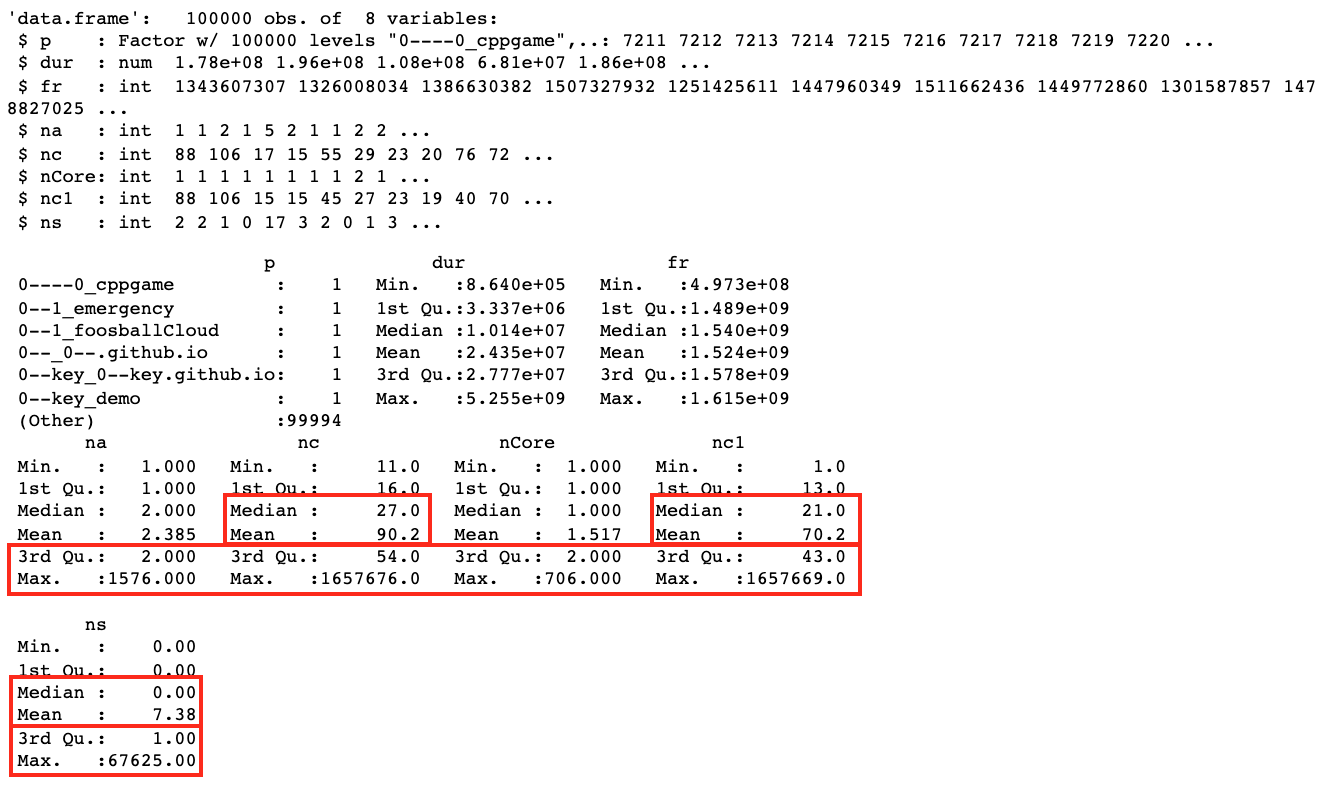

In [30]:
#------------------------------CORRELATION ANALYSIS------------------------------

# Execute correclation analysis based on collected data and analysis results
cor( as.data.frame(x[,c("ns","dur","na","nc","nCore","nc1")]), method="spearman" ) 
#The Spearman method was chosen based on the above findings.


,ns,dur,na,nc,nCore,nc1
ns,1.00000000,0.34317824,0.2020287,0.1623830,0.07092407,0.14120396
dur,0.34317824,1.00000000,0.1903002,0.2677800,0.03362421,0.26238451
na,0.20202868,0.19030019,1.0000000,0.4402142,0.67107738,0.13424720
nc,0.16238297,0.26778001,0.4402142,1.0000000,0.41055443,0.86614981
nCore,0.07092407,0.03362421,0.6710774,0.4105544,1.00000000,0.01931366
nc1,0.14120396,0.26238451,0.1342472,0.8661498,0.01931366,1.00000000


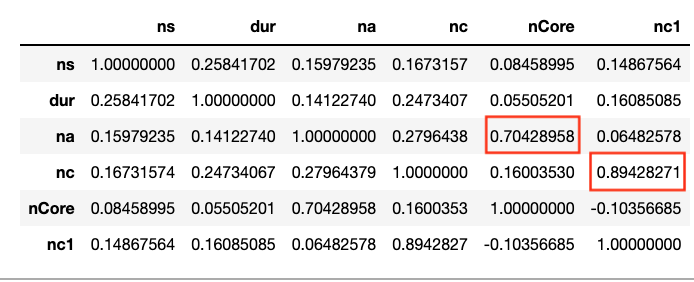

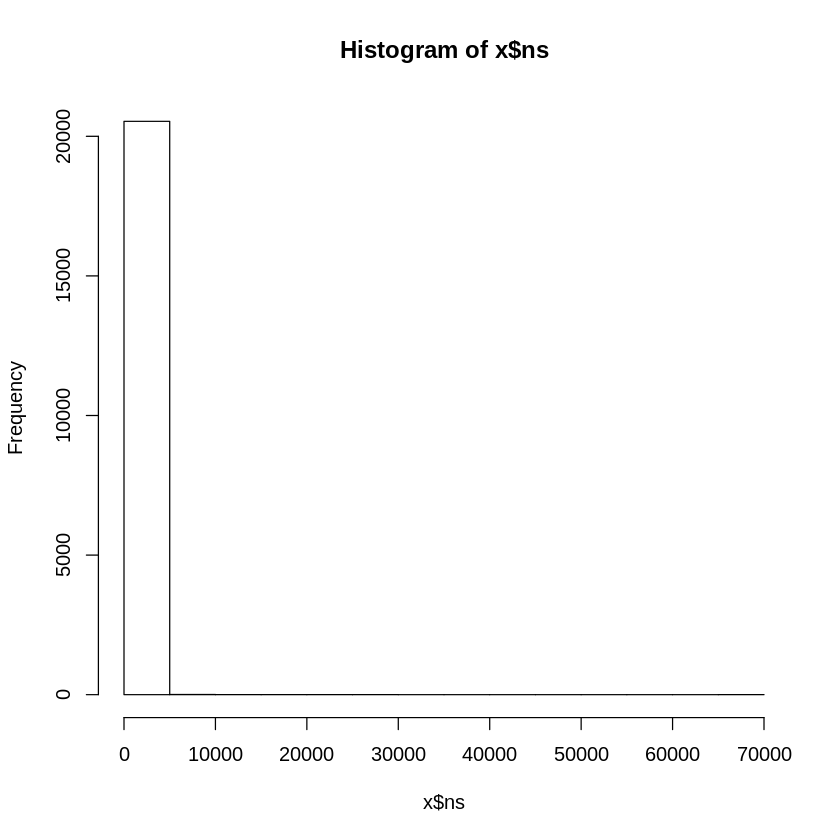

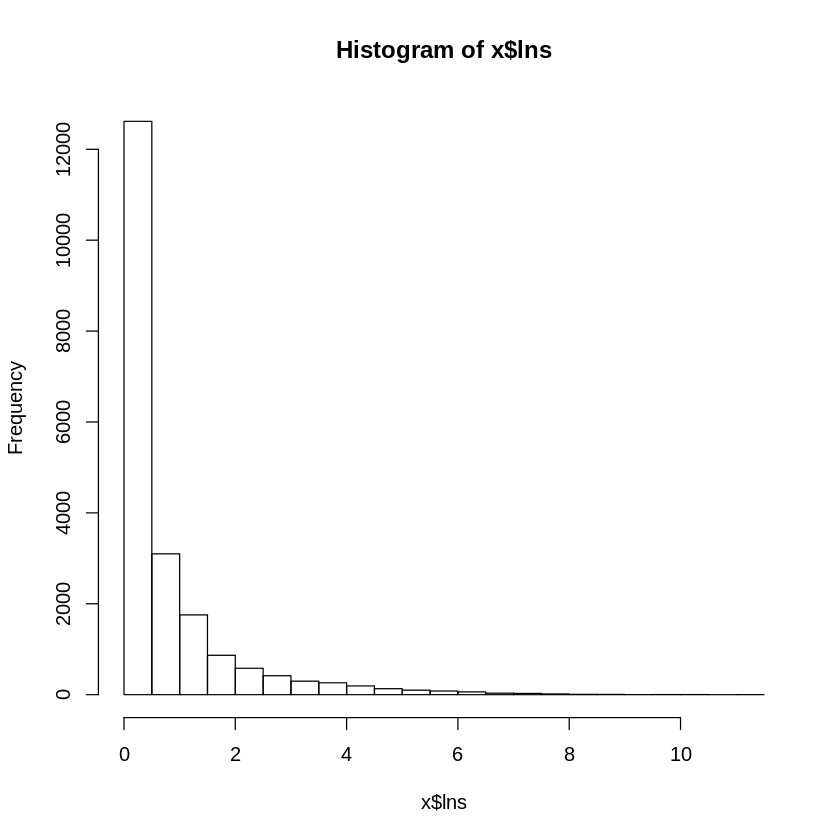

In [31]:
#------------------------------TRANSFORMATION------------------------------

#Calculate Logs
x$lns=log(x$ns+1);
x$ldur=log(x$dur+1);
x$lna=log(x$na+1);
x$lnc=log(x$nc+1);
x$lnCore=log(x$nCore+1);

# examples to see the difference
hist(x$ns)
hist(x$lns)

#Notes:
#1. Advantages: 1. narrow, 2.multiplicative model


In [32]:
#Randomly sample 100K repos
rr = 5000
rk = 2000
sel = sample(1:dim(x)[1],rr)

#first a smaller sample for analysis then a larger sample for matching
za=x[sel,][1:rk,]
zb=x[sel,][rk+1:rr,]


REGRESSION SELECTION

Apply applicable Regressions model based on previous results
- Simple Linear Regression (not applicable, too simple)
    lm(lns~ldur, data=za)
- Polynomial Regression (not applicable due to LOG transformation)
    lm(lns~ldur+I(ldur^2)+I(ldur^3), data=za)
- Multiple Linear Regression (most suitable)
    lm(lns~ldur+lnc+lna+lCore, data=za)
- Logistic Regression
    lm(lns~ldur+lnc+lna+lCore, family = binomial, data=za)



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    0)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4155 -0.6463 -0.1943  0.3059  6.5669 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.76967    0.32483 -11.605  < 2e-16 ***
ldur         0.25101    0.01932  12.990  < 2e-16 ***
lnc         -0.09033    0.03715  -2.432   0.0151 *  
lna          1.19769    0.07236  16.553  < 2e-16 ***
lnCore      -0.81223    0.12318  -6.594 5.47e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.074 on 1995 degrees of freedom
Multiple R-squared:  0.2647,	Adjusted R-squared:  0.2632 
F-statistic: 179.6 on 4 and 1995 DF,  p-value: < 2.2e-16



Call:
lm(formula = lns ~ ldur + lnc + lnCore, data = za, subset = za$na > 
    0)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1737 -0.6928 -0.2760  0.2879  7.7744 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.32986    0.33144 -16.081   <2e-16 ***
ldur         0.31302    0.02021  15.487   <2e-16 ***
lnc          0.03299    0.03880   0.850    0.395    
lnCore       0.72833    0.08604   8.465   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.145 on 1996 degrees of freedom
Multiple R-squared:  0.1637,	Adjusted R-squared:  0.1625 
F-statistic: 130.3 on 3 and 1996 DF,  p-value: < 2.2e-16


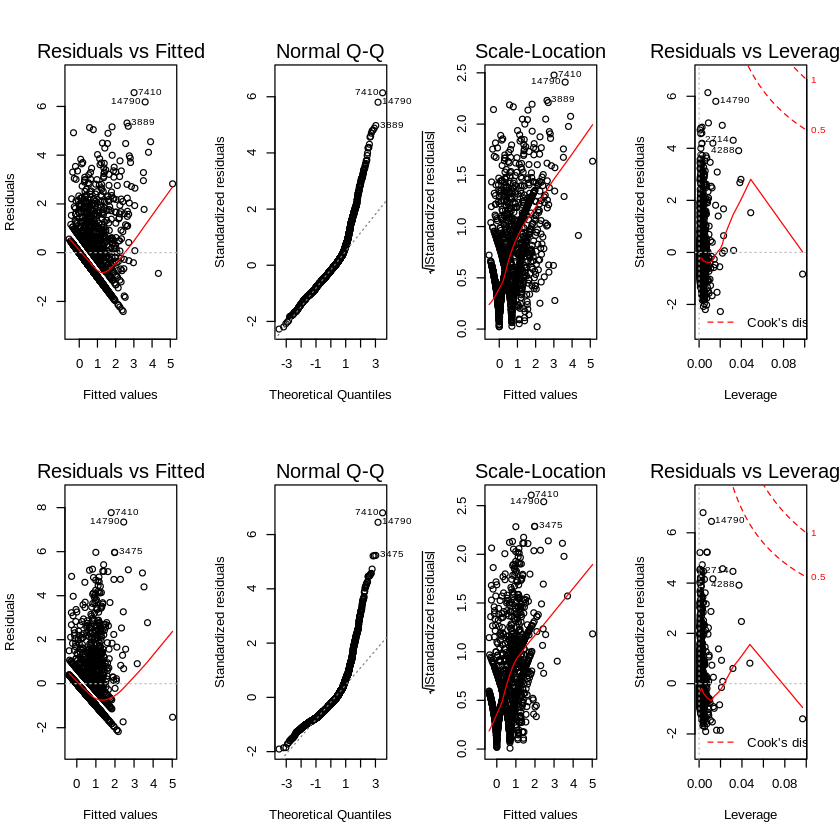

In [33]:
#-----------Linear Regression-----------

#Linear regression (least squares)
lim1=lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>0);
lim2=lm(lns~ldur+lnc+lnCore, data=za,subs=za$na>0);
summary(lim1)
summary(lim2)
par(mfrow=c(2,4))
plot(lim1)
plot(lim2)


#Notes
#Focus on 1. Adjusted R-squared, 2. lnCore


In [22]:
#projects with 300+ authors
lm300 = lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>300)
summary(lm300)

#projects with 10+ authors seem to offer good fit
lm9 = lm(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>9)
summary(lm9)

#does it change anything if we add nc1
lm8p = lm(lns~ldur+lnc+lna+lnCore+log(nc1), data=za,subs=za$na>9)
summary(lm8p)


Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    300)

Residuals:
ALL 2 residuals are 0: no residual degrees of freedom!

Coefficients: (3 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -24.898         NA      NA       NA
ldur           1.844         NA      NA       NA
lnc               NA         NA      NA       NA
lna               NA         NA      NA       NA
lnCore            NA         NA      NA       NA

Residual standard error: NaN on 0 degrees of freedom
Multiple R-squared:      1,	Adjusted R-squared:    NaN 
F-statistic:   NaN on 1 and 0 DF,  p-value: NA



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore, data = za, subset = za$na > 
    9)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9195 -1.0608 -0.2451  0.7693  4.1380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.6319     2.5713  -2.190  0.02979 *  
ldur          0.4447     0.1340   3.319  0.00109 ** 
lnc          -0.6536     0.1228  -5.324 3.02e-07 ***
lna           2.6907     0.3239   8.307 2.35e-14 ***
lnCore       -1.4463     0.2492  -5.803 2.91e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.483 on 179 degrees of freedom
Multiple R-squared:  0.3267,	Adjusted R-squared:  0.3117 
F-statistic: 21.71 on 4 and 179 DF,  p-value: 1.274e-14



Call:
lm(formula = lns ~ ldur + lnc + lna + lnCore + log(nc1), data = za, 
    subset = za$na > 9)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8390 -1.0351 -0.0731  0.7066  4.3125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -5.7587     2.5406  -2.267 0.024614 *  
ldur          0.4496     0.1324   3.396 0.000843 ***
lnc          -1.2277     0.2747  -4.469 1.39e-05 ***
lna           2.3735     0.3477   6.826 1.32e-10 ***
lnCore       -0.8282     0.3620  -2.288 0.023322 *  
log(nc1)      0.6694     0.2874   2.329 0.020976 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.465 on 178 degrees of freedom
Multiple R-squared:  0.3466,	Adjusted R-squared:  0.3283 
F-statistic: 18.89 on 5 and 178 DF,  p-value: 4.818e-15


-----------Results/models assessment-----------

1. ANOVA
2. Regression assessment based on each indep elem.
3. Akaike Information Criterion, AIC

In [34]:
#ANOVA - dispersion analysis (hipotezes ivertinimas)

anova(lim1, test="Chi")
anova(lim1,lim2)


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
ldur,1,374.77265,374.772646,324.95430,2.017109e-67
lnc,1,43.61754,43.617544,37.81948,9.349367e-10
lna,1,359.80529,359.805293,311.97655,5.526702e-65
lnCore,1,50.14291,50.142908,43.47744,5.474846e-11
Residuals,1995,2300.85102,1.153309,NA,NA


,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1995,2300.851,NA,NA,NA,NA
2,1996,2616.849,-1,-315.9977,273.9923,9.099062e-58


(Intercept)        ldur         lnc         lna      lnCore 
-3.76967367  0.25100587 -0.09032859  1.19769224 -0.81223157

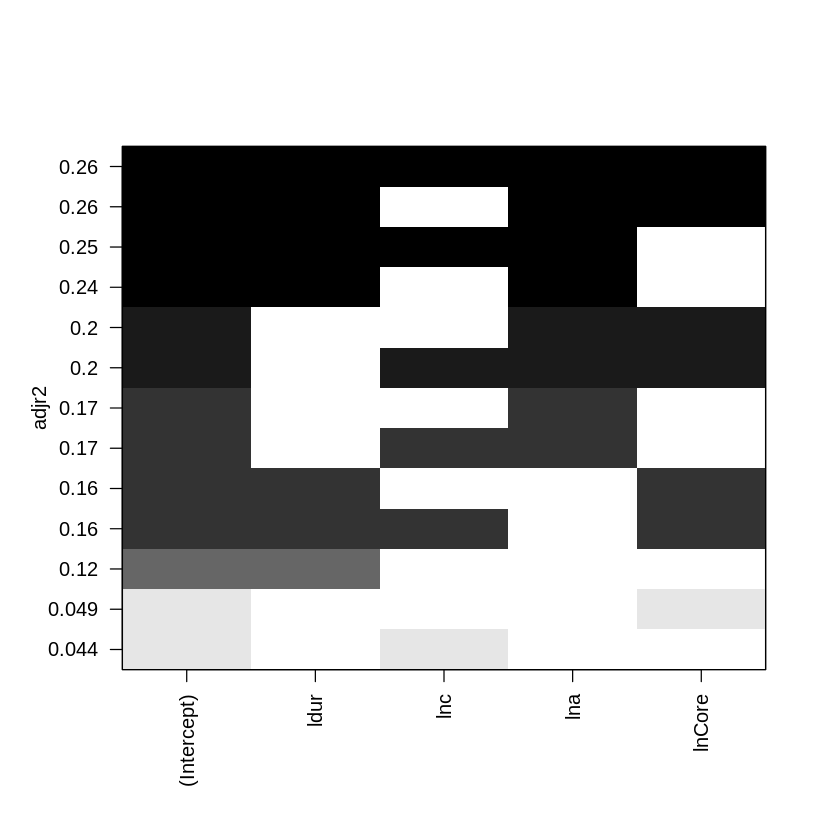

In [35]:
#Regression assessment

library(leaps)
leaps <- regsubsets(lns~ldur+lnc+lna+lnCore, data=za,subs=za$na>0, nbest=4)
# isveda n geriausiu modeliu 1 nepriklausomam kintam.
plot(leaps, scale="adjr2")

#Nepriklausomu koeficientu ivertinimas
coef(lim1) #kuo didesnis, tuo svarbesnis


In [36]:
#Akaike Information Criterion, AIC

AIC(lim1,lim2,lm300,lm9,lm8p)

Warning message in AIC.default(lim1, lim2, lm300, lm9, lm8p):
“models are not all fitted to the same number of observations”


,df,AIC
,<dbl>,<dbl>
lim1,6,5968.0179
lim2,5,6223.4014
lm300,3,-Inf
lm9,6,674.1089
lm8p,7,670.5850


In [37]:
#classificator, predicted
zpz=predict(lim1,zb)

#confusion table, actual classification
table(zpz>log(1),log(zb$ns+1)>log(1))
#table uses the cross-classifying factors to build a contingency table of the counts at each combination of factor levels.


       
        FALSE TRUE
  FALSE   264   59
  TRUE   1571 1106